# Homework 5

**Name:** Ji Jie

## Q1. DMD Exercise 2.25

Suppose 5 percent of the microchips produced by a leading microchip manufacturer are defective. Historically, given that a microchip is defective, the inspector (wrongly) accepts the chip 10 percent of the time, thinking it has no defect. If a microchip is not defective, he always correctly accepts it. Suppose that the inspector inspects 10 microchips.

(a) What is the probability that all 10 microchips in the sample are not defective?

(b) What is the probability that the inspector accepts a particular microchip?

(c) What is the probability that the inspector accepts 9 (out of 10) microchips?

(d) Given that the inspector accepts a microchip, what is the probability that it has no defect?

(e) Given that inspector accepts all 10 microchips, what is the probability that they all have no defects?


(a) What is the probability that all 10 microchips in the sample are not defective?

In [1]:
0.95 ** 10

0.5987369392383787

(b) What is the probability that the inspector accepts a particular microchip?

95.5%

(c) What is the probability that the inspector accepts 9 (out of 10) microchips?

In [1]:
0.955 ** 9 * 0.045 * 10

0.2973328255894686

(d) Given that the inspector accepts a microchip, what is the probability that it has no defect?

In [3]:
0.95 / 0.955

0.9947643979057592

(e) Given that inspector accepts all 10 microchips, what is the probability that they all have no defects?

In [4]:
(0.95 / 0.955) ** 10

0.9488604327776428

In [6]:
from scipy.stats import norm
from scipy.stats import binom

## Q2. DMD Exercise 2.27

In this exercise we examine the effects of overbooking in the airline industry. Ontario Gateway Airlines' first class cabins have 10 seats in each plane. Ontario's overbooking policy is to sell up to 11 first class tickets, since cancellations and no-shows are always possible (and indeed are quite likely). For a given flight on Ontario Gateway, there were 11 first class tickets sold. Suppose that each of the 11 persons who purchased tickets has a 20 percent chance of not showing up for the flight, and that the events that different persons show up for the flight are independent.

(a) What is the probability that at most 5 of the 11 persons who purchased first class tickets show up for the flight?

(b) What is the probability that exactly 10 of the persons who purchased first class tickets show up for the flight?

(c) Suppose that there are 10 seats in the first class available and that the cost of each first class ticket is 1,200 dollars. (This 1,200 contributes entirely to profit since the variable cost associated with a passenger on a flight is close to zero.) Suppose further that any overbooked seat costs the airline 3,000 dollars, which is the cost of the free ticket issued the passenger plus some potential cost in damanged customer relations. (First class passengers do not expect to be bumped!) Thus, for example, if 10 of the first class passengers show up for the flight, the airline's profit is 12,000. If 11 first class passengers show up, the profit is 9,000. What is the expected profit from first class passengers for this flight?

(d) Suppose that only 10 first class tickets were sold. What would be the expected profit from first class passengers for this flight?

(e) People often travel in groups of two or more. Does this affect the independence assumption about passenger behavior? Why or why not?


(a) What is the probability that at most 5 of the 11 persons who purchased first class tickets show up for the flight?

In [18]:
dist1 = binom(11,0.8)
dist1.cdf(5)

0.011654205439999985

(b) What is the probability that exactly 10 of the persons who purchased first class tickets show up for the flight?

In [19]:
dist1.cdf(10) - dist1.cdf(9)

0.23622320127999974

(c) Suppose that there are 10 seats in the first class available and that the cost of each first class ticket is 1,200 dollars. (This 1,200 contributes entirely to profit since the variable cost associated with a passenger on a flight is close to zero.) Suppose further that any overbooked seat costs the airline 3,000 dollars, which is the cost of the free ticket issued the passenger plus some potential cost in damanged customer relations. (First class passengers do not expect to be bumped!) Thus, for example, if 10 of the first class passengers show up for the flight, the airline's profit is 12,000. If 11 first class passengers show up, the profit is 9,000. What is the expected profit from first class passengers for this flight?

In [60]:
exp_val_1 = dist1.cdf(0)*0*1200
for i in range(0,12):
    if i <= 10:
        exp_tmp = (dist1.cdf(i) - dist1.cdf(i-1)) * i * 1200
    else:
        exp_tmp = (dist1.cdf(i) - dist1.cdf(i-1)) *(12000-3000*(i-10))
    exp_val_1 += exp_tmp
print(exp_val_1)

10199.222747135998


In [61]:
exp_val_1

10199.222747135998

(d) Suppose that only 10 first class tickets were sold. What would be the expected profit from first class passengers for this flight?

In [49]:
dist2 = binom(10,0.8)
exp_val_2 = dist2.cdf(0)*0*1200
for i in range(0,11):
    exp_tmp = (dist2.cdf(i) - dist2.cdf(i-1)) * i * 1200
    exp_val_2 += exp_tmp
print(exp_val_2)
    

9600.0


In [42]:
import pandas as pd
hist = binom(n=10,p=0.8)
probs = pd.Series(hist.pmf(range(1,11)))
profits = 1200*pd.Series(range(1,11))
sum= probs*profits

In [47]:
?binom

In [45]:
probs

0    0.000004
1    0.000074
2    0.000786
3    0.005505
4    0.026424
5    0.088080
6    0.201327
7    0.301990
8    0.268435
9    0.107374
dtype: float64

In [43]:
sum

0       0.004915
1       0.176947
2       2.831155
3      26.424115
4     158.544691
5     634.178765
6    1691.143373
7    2899.102925
8    2899.102925
9    1288.490189
dtype: float64

(e) People often travel in groups of two or more. Does this affect the independence assumption about passenger behavior? Why or why not?

Yes, the decision of one of the people in the group will affect others' decision.

## Q3. DMD Exercise 3.6
Winter lasts from December 21 through March 21. The average winter temperature in Boston is Normally distributed with mean $\mu=32.5$ Fahrenheit and standard deviation is $\sigma=1.59$ Fahrenheit. In New York City, the average winter temperature is Normally distributed with mean $\mu=35.4$ Fahrenheit and standard deviation $\sigma=2.05$ Fahrenheit.

(a) What is the probability that the average winter temperature in Boston this coming winter will be above freezing (32 degrees Fahrenheit)?

(b) Assume that average winter temperatures in Boston and New York are independent. What is the probability that the average winter temperature in Boston in the coming winter will be higher than in New York?

(c) Do you think the independence assumption above is reasonable?


(a) What is the probability that the average winter temperature in Boston this coming winter will be above freezing (32 degrees Fahrenheit)?

In [39]:
dist_boston = norm(32.5,1.59)
1 - dist_boston.cdf(32)

0.6234162076815486

(b) Assume that average winter temperatures in Boston and New York are independent. What is the probability that the average winter temperature in Boston in the coming winter will be higher than in New York?

In [80]:
std = (1.59**2+2.05**2)**(1/2)

In [81]:
dist_diff = norm(-2.9,std)

In [82]:
1-dist_diff.cdf(0)

0.13182236136768588

(c) Do you think the independence assumption above is reasonable?

Because these two cities are really nearby, so that their temperature might be somehow related.

## Q4. DMD Exercise 3.20

The paint department in an automobile factory applies two processes when painting cars: (i) painting and (ii) polishing. The painting process is defective 20\% of the time, while the polishing process is defective 10\% of the time. Each car first goes through the painting and then through the polishing process. Each car is inspected after it has completed the two processes. If either the painting or the polishing is defective, the car is returned to a special station for rework, where the two processes are applied once again. Rework at the special station is 100\% reliable (although it is also very expensive).

(a) What is the probability that a car is returned to the special station for rework?

(b) In a batch of 1000 cars, what is the expected number of cars that will be returned for rework?

(c) In a batch of 1000 cars, what is the probability that the number of returned cars is less than or equal to 200?

(d) Let $X$ be the number of cars in a group by 1000 cars that have painting defects. Let $Y$ be the number of cars in a group of 1000 cars that have polishing defects. What is the distribution of $X$? What is the distribution of $Y$?

(e) What is the probabiltiy that the total number of defects, $X+Y$, is less than or equal to 300?


(a) What is the probability that a car is returned to the special station for rework?

In [93]:
1 - 0.8*0.9

0.2799999999999999

In [85]:
round(1 - 0.8*0.9,2)

0.28

(b) In a batch of 1000 cars, what is the expected number of cars that will be returned for rework?

In [86]:
1000 * round(1 - 0.8*0.9,2)

280.0

(c) In a batch of 1000 cars, what is the probability that the number of returned cars is less than or equal to 200?

In [87]:
dist_car = binom(1000,0.28)

In [90]:
dist_car.cdf(200)

3.600219457488701e-09

(d) Let  𝑋  be the number of cars in a group by 1000 cars that have painting defects. Let  𝑌  be the number of cars in a group of 1000 cars that have polishing defects. What is the distribution of  𝑋 ? What is the distribution of  𝑌 ?

In [91]:
X = binom(1000,0.2)
Y = binom(1000,0.1)

(e) What is the probabiltiy that the total number of defects,  𝑋+𝑌 , is less than or equal to 300?

In [92]:
Z = binom(2000,0.15)
Z.cdf(300)

0.5153994673923278

## Q5. Actuarial Science

A life insurance company would like to conduct an analysis on its policy holders. The database shows that 60\% of policyholders are male, and 40\% are female. In this population, assume that the lifespan of a man obeys a Normal distribution with mean 75 years and standard deviation 15 years. (Lifespan is defined as the number of years from birth to death.) The lifespan of a woman obeys a Normal distribution with mean 80 and standard deviation 12 years.  All individuals’ lifespans are independent of one another.  

**A.** What is the probability that a randomly drawn individual lives at least 85 years?

In [94]:
0.6*75+0.4*80

77.0

In [119]:
std = (0.6*15**2+0.4*12**2)**(1/2)

In [116]:
(1 - dist_male.cdf(85))*0.6+(1 - dist_female.cdf(85))*0.4

0.2868799703324296

**B.** Given that a randomly drawn individual lives at least 85 years, what is the probability that the individual is male?

In [117]:
(1 - dist_male.cdf(85))*0.6/((1 - dist_male.cdf(85))*0.6+(1 - dist_female.cdf(85))*0.4)

0.5280798180249543

**C.** Given that a randomly drawn individual lives at least 85 years, what is the probability that the individual lives at least 5 more years?

In [130]:
p_over90 = (1 - dist_male.cdf(90))*0.6+(1 - dist_female.cdf(90))*0.4

In [128]:
p_over85 = (1 - dist_male.cdf(85))*0.6+(1 - dist_female.cdf(85))*0.4

In [132]:
p_over90 / p_over85

0.6139309919066244

## Q6. Simulating Distribution of Daily Earnings at Rockport

In this exercise, you will use the `scipy.stats` package and `np.random.choice` function to generate normal and general discrete samples, in order to plot the shape of the probability distributions of the daily earnings from using Rockport in the example in DMD 5.1 (from pre-class readings). Simulate 10000 samples and plot the frequency instead of the density. You should also include the proper titles and labels of the x and y axis. Write your code in the code cell below (a correct sample graph is below).

**Hints:**
See page 196-197 in DMD for description of the distribution. It has the form $price*min(demand,3500)-10000$, where price is normally distributed with mean $\mu = 3.65$ and standard deviation of $\sigma=0.2$, demand follows a discrete distribution, as in the following table. You should make the price zero whenever you get a negative sample.

| Demand (lbs of codfish) | Probability |
|--|--|
|0 | 0.02|
|1000|0.03|
|2000|0.05|
|3000|0.08|
|4000|0.33|
|5000|0.29|
|6000|0.20|



In [138]:
values = [0,1000,2000,3000,4000,5000,6000]
probs = [0.02,0.03,0.05,0.08,0.33,0.29,0.20]
demand = pd.DataFrame(columns = ['demand', 'price'])
pri_dist = norm(3.65,0.2)
for i in range(10000):
    demand_tmp = np.random.choice(values, p=probs)
    price_tmp = pri_dist.rvs()
    demand = demand.append({'demand':demand_tmp, 'price':price_tmp}, ignore_index = True)

In [150]:
demand_1 = [3500.0 if i>=3500 else i for i in demand.demand]

In [151]:
demand['demand_1'] = demand_1

In [178]:
demand['revenue'] = (demand.price * demand.demand_1 - 10000)

In [180]:
rev = demand.revenue

In [185]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

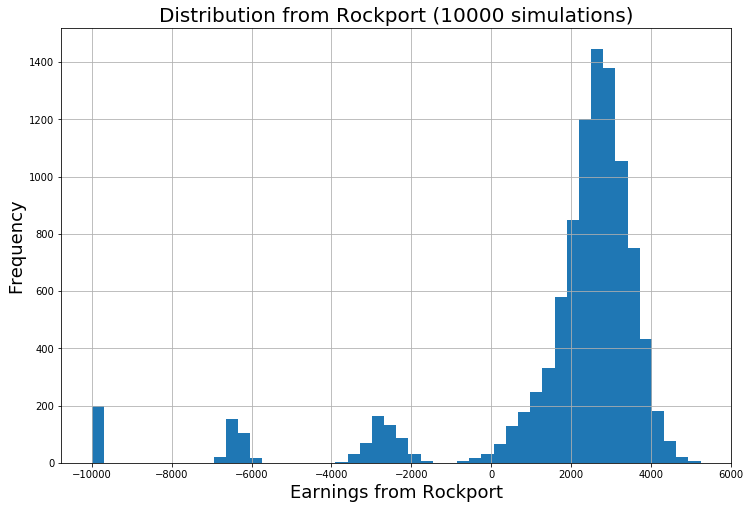

In [190]:
plt.figure(figsize = (12,8))
rev.hist(bins=50)
plt.title('Distribution from Rockport (10000 simulations)', fontsize = 20)
plt.xlabel('Earnings from Rockport', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)